In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketing = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
pd.set_option('display.max_columns', None)
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

## Missing values

In [5]:
marketing.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
marketing[marketing['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


24 missing entries for income column.

We can try imputing the income based on education later.

Let's see the distribution of our target response.

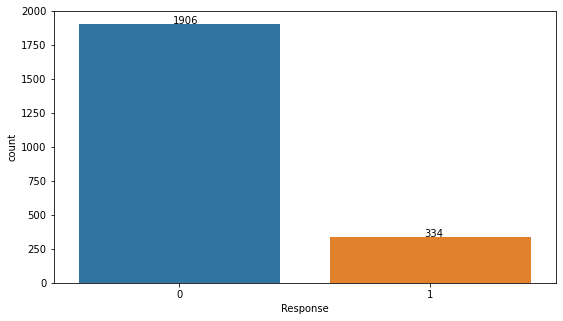

In [7]:
fig = plt.figure(figsize = (9,5))
ax = sns.countplot(x = 'Response', data = marketing)

for p, label in zip(ax.patches, marketing["Response"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.4))


We actually have a really unbalanced distribution where most of the customers in our dataset did not end up responding to any of the campaigns.

Let's look at the customers's income by those who responded vs those who didn't

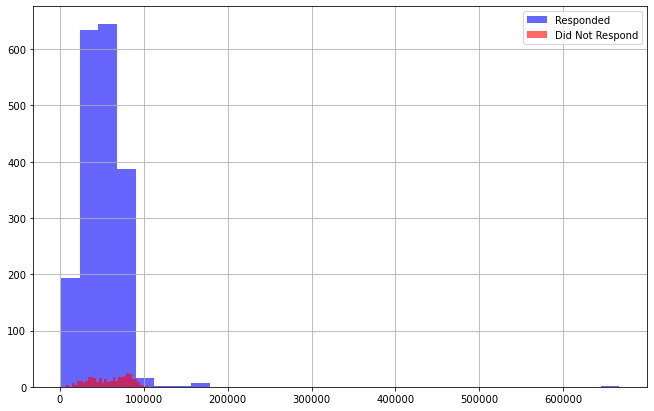

In [8]:
plt.figure(figsize = (11,7))
marketing[marketing['Response'] == 0]['Income'].dropna().hist(bins = 30, alpha = 0.6, label = 'Responded', color = 'blue')
marketing[marketing['Response'] == 1]['Income'].dropna().hist(bins = 30, alpha = 0.6, label = 'Did Not Respond', color = 'red')
plt.legend()

Hard to make any conclusions since, again, the distribution is really inbalanced, but there are some major outliers/far out points in terms of income for those who have responded.

How about income and marital status? We're dropping thhe big income outlier.

<Figure size 1080x576 with 0 Axes>

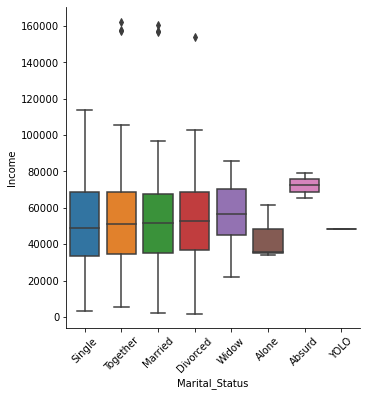

In [9]:
plt.figure(figsize = (15,8))
ax = sns.catplot(x="Marital_Status", y="Income", kind="box", data=marketing.drop(marketing[marketing['Income'] > 500000].index))
plt.xticks(rotation=45)
plt.show()

There are some interesting descriptions for marital status. A major outlier in 'Together' is pushing the x-axis way up and making the differences between marital status incomes seem insignificant. Regardless there doesn't seem to be any major differences in income between the main statuses of Single, Together, Married, Divorced, and Widow. 

Let's see how closely education and income are to each other.

<Figure size 1080x576 with 0 Axes>

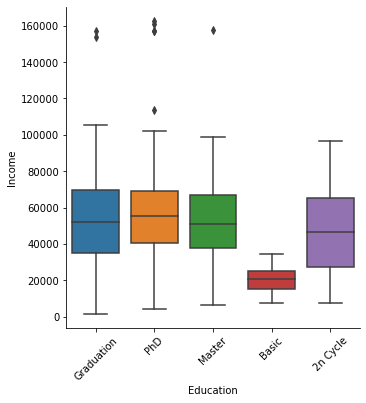

In [10]:
plt.figure(figsize = (15,8))
ax = sns.catplot(x="Education", y="Income", kind="box", data=marketing.drop(marketing[marketing['Income'] > 500000].index))
plt.xticks(rotation=45)
plt.show()

Unfortunately, there does seem to be some difference in income with education, particularly median income increases with education level.

# Data Preprocessing

We're going to try imputing the 24 missing income values with education.

In [11]:
def impute_income(cols):
    Income = cols[0]
    educ = cols[1]

    if pd.isnull(Income):
        if educ == 'Graduation':
            return round(marketing[marketing['Education'] == 'Graduation']['Income'].dropna().mean() ) # the average for grads
        elif educ == 'PhD':
            return round(marketing[marketing['Education'] == 'PhD']['Income'].dropna().mean()) # the average for phd's
        elif educ == 'Master':
            return round(marketing[marketing['Education'] == 'Master']['Income'].dropna().mean()) # the average for masters
        elif educ == 'Basic':
                return round(marketing[marketing['Education'] == 'Basic']['Income'].dropna().mean())  # basic        
        else:
                return round(marketing[marketing['Education'] == '2n Cycle']['Income'].dropna().mean()) # 2n cycle
                          
    else:
        return Income

In [12]:
marketing['Income'] = marketing[['Income', 'Education']].apply(impute_income, axis = 1)
marketing['Income'].isna().sum()

0

We successfully imputed the missing values for Income.

Now to drop columns we don't need.

In [13]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
marketing.drop(['ID','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

We're not interested in which campaign the customer responded in. We also don't know what `Z_CostContact` and `Z_Revenue` are supposed to represent since they're not in the documentation, and they seem to be all the same value anyways. 

We also want to convert customer date of enrollment to a number that we can use, like days of enrollment.

In [15]:
from datetime import datetime, date

def get_days(date):
    start = date
  
    #Identify given date as date month and year
    start = datetime.strptime(start, "%d-%m-%Y").date()
  
    # Set "today" as January 1st, 2015
    today = datetime.strptime("01-01-2015", "%d-%m-%Y").date()

    return (today - start).days

In [16]:
marketing['Days Enrolled'] = marketing['Dt_Customer'].apply(get_days)

In [17]:
marketing['Days Enrolled']

0       849
1       299
2       498
3       325
4       347
       ... 
2235    567
2236    205
2237    341
2238    342
2239    808
Name: Days Enrolled, Length: 2240, dtype: int64

In [18]:
marketing.drop(['Dt_Customer'], axis = 1, inplace = True)

Now to vectorize our remaining categorical variables.

In [19]:
marketing['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [20]:
data = pd.get_dummies(marketing, columns = ['Education','Marital_Status'], drop_first = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

# Unsupervised Learning

## Kmeans

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=2)
# Start with two means. Hopefully we can separate response from non-response

In [24]:
# Fit on data except target response
kmeans.fit(data.drop('Response', axis = 1))

KMeans(n_clusters=2)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Response'],kmeans.labels_))
print(classification_report(data['Response'],kmeans.labels_))

[[1039  867]
 [ 131  203]]
              precision    recall  f1-score   support

           0       0.89      0.55      0.68      1906
           1       0.19      0.61      0.29       334

    accuracy                           0.55      2240
   macro avg       0.54      0.58      0.48      2240
weighted avg       0.78      0.55      0.62      2240



## Spectral Clustering

In [26]:
from sklearn.cluster import SpectralClustering

In [27]:
model = SpectralClustering(n_clusters = 2,
                          affinity = 'nearest_neighbors', assign_labels = 'kmeans')
sc_labels = model.fit_predict(data.drop('Response', axis = 1))

In [28]:
print(confusion_matrix(data['Response'], sc_labels))
print(classification_report(data['Response'], sc_labels))

[[ 808 1098]
 [ 104  230]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57      1906
           1       0.17      0.69      0.28       334

    accuracy                           0.46      2240
   macro avg       0.53      0.56      0.43      2240
weighted avg       0.78      0.46      0.53      2240



Spectral Clustering yielding similar results to KMeans

## MDS

First normalize features

In [29]:
from sklearn.preprocessing import normalize

In [30]:
norm_features = normalize(data)

norm_data = pd.DataFrame(norm_features, columns = data.columns)
norm_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days Enrolled,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.033635,0.999216,0.000000,0.000000,0.000997,0.010914,0.001512,0.009384,0.002956,0.001512,0.001512,0.000052,0.000137,0.000172,0.000069,0.000120,0.0,0.000017,0.014592,0.0,0.000017,0.0,0.000000,0.0,0.0,0.000000,0.000017,0.000000,0.0,0.0
1,0.042125,0.999091,0.000022,0.000022,0.000819,0.000237,0.000022,0.000129,0.000043,0.000022,0.000129,0.000043,0.000022,0.000022,0.000043,0.000108,0.0,0.000000,0.006446,0.0,0.000022,0.0,0.000000,0.0,0.0,0.000000,0.000022,0.000000,0.0,0.0
2,0.027428,0.999579,0.000000,0.000000,0.000363,0.005946,0.000684,0.001773,0.001549,0.000293,0.000586,0.000014,0.000112,0.000028,0.000140,0.000056,0.0,0.000000,0.006951,0.0,0.000014,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000014,0.0,0.0
3,0.074247,0.997165,0.000037,0.000000,0.000973,0.000412,0.000150,0.000748,0.000374,0.000112,0.000187,0.000075,0.000075,0.000000,0.000150,0.000225,0.0,0.000000,0.012162,0.0,0.000037,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000037,0.0,0.0
4,0.033963,0.999397,0.000017,0.000000,0.001612,0.002966,0.000737,0.002023,0.000789,0.000463,0.000257,0.000086,0.000086,0.000051,0.000103,0.000086,0.0,0.000000,0.005949,0.0,0.000000,0.0,0.000017,0.0,0.0,0.000017,0.000000,0.000000,0.0,0.0


In [31]:
from sklearn.manifold import MDS

In [32]:
model = MDS(n_components = 2, random_state = 42)
data_transformed = model.fit_transform(norm_data.drop('Response', axis = 1))

In [33]:
data_transformed

array([[-0.01450418,  0.01188416],
       [ 0.00315616,  0.00827358],
       [-0.00732553,  0.02075406],
       ...,
       [-0.01478409,  0.01336632],
       [-0.00623745,  0.02121685],
       [-0.00780408,  0.00749149]])

In [34]:
print("Original shape: {}".format(str(data.drop('Response', axis = 1).shape)))
print("Reduced shape: {}".format(str(data_transformed.shape)))

Original shape: (2240, 29)
Reduced shape: (2240, 2)


## MDS Model Building with KMeans

In [35]:
# now do k-means clustering on this 2-dim data (I'll just choose a random number of clusters, say 2)
kmeans = KMeans(n_clusters=2) 
kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)

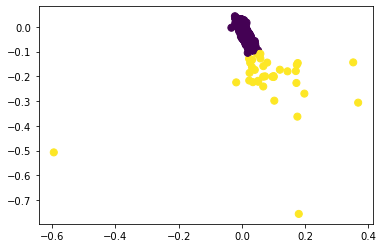

In [36]:
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [37]:
print(confusion_matrix(data['Response'], y_kmeans))
print(classification_report(data['Response'], y_kmeans))

[[1873   33]
 [ 331    3]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1906
           1       0.08      0.01      0.02       334

    accuracy                           0.84      2240
   macro avg       0.47      0.50      0.46      2240
weighted avg       0.74      0.84      0.78      2240



Pretty decent results

## MDS Model Building with Spectral Clustering

In [38]:
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
sc_labels = model.fit_predict(data_transformed)

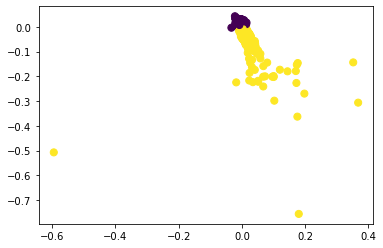

In [39]:
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=sc_labels, s=50, cmap='viridis')

In [40]:
print(confusion_matrix(data['Response'], sc_labels))
print(classification_report(data['Response'], sc_labels))

[[1252  654]
 [ 248   86]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1906
           1       0.12      0.26      0.16       334

    accuracy                           0.60      2240
   macro avg       0.48      0.46      0.45      2240
weighted avg       0.73      0.60      0.65      2240



Results are not as great here.

## PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
# keep the first 2 principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to data
pca.fit(norm_data.drop('Response', axis = 1))
# transform data onto the first two principal components
market_pca = pca.transform(norm_data.drop('Response', axis = 1))
print("Original shape: {}".format(str(norm_data.drop('Response', axis = 1).shape)))
print("Reduced shape: {}".format(str(market_pca.shape)))

Original shape: (2240, 29)
Reduced shape: (2240, 2)


## PCA Model building with KMeans

In [43]:
# now do k-means clustering on this 2-dim data (I'll just choose a random number of clusters, say 2)
kmeans = KMeans(n_clusters=2) 
kmeans.fit(market_pca)
y_kmeans = kmeans.predict(market_pca)

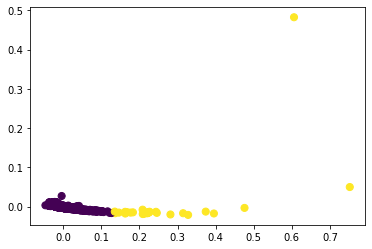

In [44]:
plt.scatter(market_pca[:, 0], market_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [45]:
print(confusion_matrix(data['Response'], y_kmeans))
print(classification_report(data['Response'], y_kmeans))

[[1877   29]
 [ 331    3]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1906
           1       0.09      0.01      0.02       334

    accuracy                           0.84      2240
   macro avg       0.47      0.50      0.46      2240
weighted avg       0.74      0.84      0.78      2240



Results are actually pretty decent here. Identical with MDS with KMeans

## PCA Model Building with Spectral Clustering

In [46]:
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
sc_labels = model.fit_predict(market_pca)

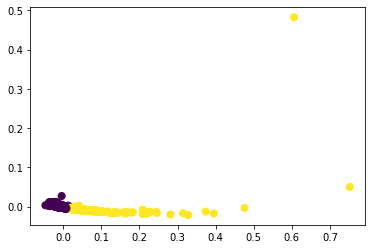

In [47]:
plt.scatter(market_pca[:, 0], market_pca[:, 1], c=sc_labels, s=50, cmap='viridis')

In [48]:
print(confusion_matrix(data['Response'], sc_labels))
print(classification_report(data['Response'], sc_labels))

[[1507  399]
 [ 288   46]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1906
           1       0.10      0.14      0.12       334

    accuracy                           0.69      2240
   macro avg       0.47      0.46      0.47      2240
weighted avg       0.73      0.69      0.71      2240



Results are worse than PCA with KMeans

# Supervised Learning

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = data.drop('Response', axis = 1)
y = data['Response']
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.1, random_state = 42)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression(max_iter = 3000)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_val)

## KNN

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [54]:
scaler = StandardScaler()
scaler.fit(X_train) # fit to data, not the target class
scaled_features = scaler.transform(X_train)

X_tr_scaled = pd.DataFrame(scaled_features, columns = X_train.columns)
X_tr_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Days Enrolled,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.423000,-0.683282,1.040271,-0.927498,-0.029722,-0.848246,-0.660358,-0.724413,-0.687753,-0.655600,-0.705130,-0.666067,-1.105854,-0.894079,-1.156892,1.108054,-0.100111,0.442855,-0.157667,-1.006637,-0.442472,1.883180,-0.040701,-0.334964,1.254213,-0.525895,-0.587111,-0.189682,-0.023486
1,0.506305,-1.250669,1.040271,-0.927498,-0.863476,-0.883832,-0.536106,-0.693402,-0.168050,-0.511886,-0.295291,0.361790,-0.739725,-0.562749,-0.850616,-0.112600,-0.100111,-0.652320,-0.157667,-1.006637,-0.442472,-0.531017,-0.040701,-0.334964,-0.797313,-0.525895,1.703254,-0.189682,-0.023486
2,1.339354,-0.727042,1.040271,-0.927498,-0.585558,-0.664381,-0.411854,-0.485185,-0.632071,-0.631648,-0.392872,-0.152139,-0.007468,-0.894079,-0.544340,1.108054,-0.100111,0.318966,-0.157667,-1.006637,-0.442472,1.883180,-0.040701,-0.334964,1.254213,-0.525895,-0.587111,-0.189682,-0.023486
3,0.256390,-0.530696,1.040271,0.923417,-1.627751,-0.777072,-0.560956,-0.635810,-0.632071,-0.583743,-0.783194,0.361790,-0.373597,-0.894079,-0.850616,1.108054,-0.100111,0.095967,-0.157667,-1.006637,-0.442472,1.883180,-0.040701,-0.334964,-0.797313,1.901519,-0.587111,-0.189682,-0.023486
4,1.089440,0.545527,-0.828097,-0.927498,1.012470,0.290526,1.725282,1.247005,3.395629,1.643827,-0.217227,-0.666067,0.358661,1.425229,0.068211,-0.926369,-0.100111,1.433963,-0.157667,-1.006637,-0.442472,-0.531017,-0.040701,-0.334964,-0.797313,-0.525895,1.703254,-0.189682,-0.023486


In [55]:
param_grid = {'n_neighbors': np.arange(1,40)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, return_train_score = True)
grid.fit(X_tr_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             return_train_score=True)

In [56]:
print(f"Best mean cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")
print(f"Test-set score: {grid.score(X_test, y_test):.3f}")

Best mean cross-validation score: 0.8594295542060484
Best parameters: {'n_neighbors': 9}
Test-set score: 0.821


In [57]:
scaled_val_features = scaler.transform(X_val)
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_.get('n_neighbors'))
knn_model.fit(X_tr_scaled, y_train)
knn_predictions = knn_model.predict(scaled_val_features)

## SVM

In [58]:
from sklearn import svm

In [59]:
param_grid = {'C': [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(svm.SVC(), param_grid = param_grid, return_train_score = True)
grid.fit(X_tr_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             return_train_score=True)

In [60]:
print(f"Best mean cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")
print(f"Test-set score: {grid.score(X_test, y_test):.3f}")

Best mean cross-validation score: 0.8654901602666545
Best parameters: {'C': 1}
Test-set score: 0.821


In [61]:
svm_model = svm.SVC(C = grid.best_params_.get('C'))
svm_model.fit(X_tr_scaled, y_train)
svm_predictions = svm_model.predict(scaled_val_features)

## Decision Trees and Random Forests

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_val)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_val)

## Model Evaluation

In [66]:
print('Logistic Regression')
print(confusion_matrix(log_predictions, y_val))
print('\n')
print(classification_report(log_predictions, y_val))

Logistic Regression
[[172  20]
 [  6   4]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       192
           1       0.17      0.40      0.24        10

    accuracy                           0.87       202
   macro avg       0.57      0.65      0.58       202
weighted avg       0.93      0.87      0.90       202



In [67]:
print('KNN')
print(confusion_matrix(knn_predictions, y_val))
print('\n')
print(classification_report(knn_predictions, y_val))

KNN
[[175  21]
 [  3   3]]


              precision    recall  f1-score   support

           0       0.98      0.89      0.94       196
           1       0.12      0.50      0.20         6

    accuracy                           0.88       202
   macro avg       0.55      0.70      0.57       202
weighted avg       0.96      0.88      0.91       202



In [68]:
print('SVM')
print(confusion_matrix(svm_predictions, y_val))
print('\n')
print(classification_report(svm_predictions, y_val))

SVM
[[175  18]
 [  3   6]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       193
           1       0.25      0.67      0.36         9

    accuracy                           0.90       202
   macro avg       0.62      0.79      0.65       202
weighted avg       0.95      0.90      0.92       202



In [69]:
print('Decision Tree')
print(confusion_matrix(dtree_predictions, y_val))
print('\n')
print(classification_report(dtree_predictions, y_val))

Decision Tree
[[156  13]
 [ 22  11]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       169
           1       0.46      0.33      0.39        33

    accuracy                           0.83       202
   macro avg       0.67      0.63      0.64       202
weighted avg       0.81      0.83      0.82       202



In [70]:
print('Random Forest')
print(confusion_matrix(rfc_predictions, y_val))
print('\n')
print(classification_report(rfc_predictions, y_val))

Random Forest
[[174  20]
 [  4   4]]


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       194
           1       0.17      0.50      0.25         8

    accuracy                           0.88       202
   macro avg       0.57      0.70      0.59       202
weighted avg       0.95      0.88      0.91       202



In [71]:
rfc.feature_importances_

array([0.05282289, 0.08845063, 0.00803062, 0.0186425 , 0.10324081,
       0.08921605, 0.04412658, 0.07483038, 0.04681711, 0.04298358,
       0.06361221, 0.02987994, 0.03397959, 0.04579552, 0.04844258,
       0.04103313, 0.00107497, 0.08792754, 0.00173339, 0.01056423,
       0.00692034, 0.01152962, 0.00235605, 0.00850806, 0.01003458,
       0.01223256, 0.0081803 , 0.00644906, 0.00058519])